# **Business Objective: Predicting Breast Cancer Survival - Clinical Data**

[Breast cancer](https://www.nationalbreastcancer.org/breast-cancer-facts) is the most common cancer in American women, affecting one in eight, and represents 15% of all new cancer cases in the U.S. An estimated 41,760 women will die from breast cancer in 2020, but there are > 3.5 million survivors in the U.S. What do [clinical data](https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/download) tell us about breast cancer survivors? Here, we predict patients' overall survival using classification models: **Logistic Regression, K-Nearest Neighbor, Support Vector Machine (SVM), Kernel SVM, Decision Tree, Random Forest, and XGBoost Classification**. We then determine which model(s) are the most accurate.

## Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import the clinical dataset

Please go [here](https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric) for the dataset description

In [ ]:
brca = pd.read_csv('METABRIC_RNA_Mutation.csv')
X_clinic_1 = brca.iloc[:, 1:24].values
X_clinic_2 = brca.iloc[:, 25:31].values
X_clinic = np.append(X_clinic_1, X_clinic_2, axis=1)

y = brca.iloc[:, 24].values

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pd.set_option('display.max_columns', 1000)
brca.head(10)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,smad1,smad2,smad3,smad4,smad5,smad6,smad7,smad9,sptbn1,terc,tert,tgfb1,tgfb2,tgfb3,tgfbr1,tgfbr2,tgfbr3,tsc1,tsc2,vegfa,vegfb,wfdc2,wwox,zfyve9,arid1a,arid1b,cbfb,gata3,kmt2c,kmt2d,myh9,ncor1,pde4dip,ptprd,ros1,runx1,tbx3,abcb1,abcb11,abcc1,abcc10,bbc3,bmf,cyp2c8,cyp3a4,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,sha

Clinical data starts from 'age_at_diagnosis' to 'death_from_cancer', excluding 'overall_survival' since this is the target data

## Check for balanced data for Survival/No Survival outcome

In [ ]:
brca.iloc[:, 24].value_counts(normalize = True)

0    0.579307
1    0.420693
Name: overall_survival, dtype: float64

The labeled data (y) is pretty balanced.

## ***Data Preprocessing***

## Check for Null Values

In [ ]:
# Check for both clinical and genetic data
null_count = brca.isnull().sum()
null_pct = ((brca.isnull().sum())/(brca.isnull().count()))*100
null_type = brca.dtypes
missing_data = pd.concat([null_count, null_pct, null_type], axis = 1, keys = ['Null Values', 'Percent of Total', 'Data Type'])
missing_data = missing_data.sort_values(by = 'Percent of Total', ascending = False).round(2)

missing_data.head(20)

,Null Values,Percent of Total,Data Type
tumor_stage,501,26.31,float64
3-gene_classifier_subtype,204,10.71,object
primary_tumor_laterality,106,5.57,object
neoplasm_histologic_grade,72,3.78,float64
cellularity,54,2.84,object
mutation_count,45,2.36,float64
er_status_measured_by_ihc,30,1.58,object
type_of_breast_surgery,22,1.16,object
tumor_size,20,1.05,float64
cancer_type_detailed,15,0.79,object


All null values are in the clinical dataset. No null values in genetic dataset.

## Take care of missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_mode.fit(X_clinic[:, [1,3,4,8,10,13,17,19,21,25,27,28]])
X_clinic[:, [1,3,4,8,10,13,17,19,21,25,27,28]] = imputer_mode.transform(X_clinic[:, [1,3,4,8,10,13,17,19,21,25,27,28]])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean.fit(X_clinic[:, 26:27])
X_clinic[:, 26:27] = imputer_mean.transform(X_clinic[:, 26:27])

## ***Exploratory Data Analysis***

## Determine Feature Correlations

In [ ]:
def make_corr_map(df, title='Correlation Heat Map', size=(9,7)):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr)) # for upper triangle
    f, ax = plt.subplots(figsize=size)
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(title)

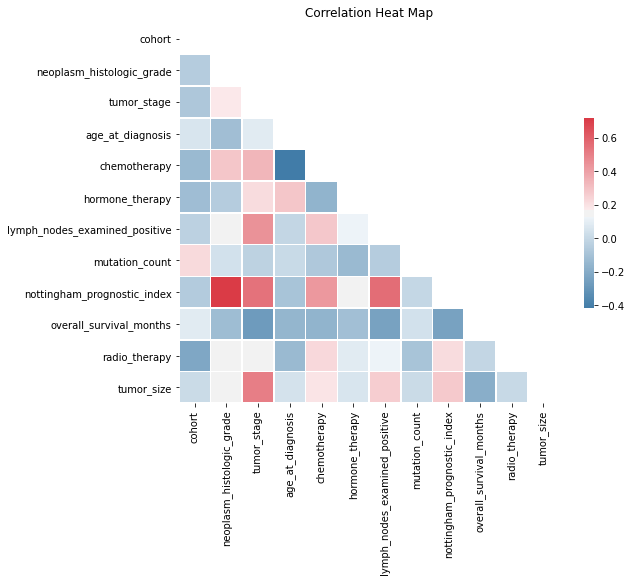

In [ ]:
# Create list of clinical data features
clinic_bin = ['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'cohort',
          'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype',
          'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'tumor_stage', 'chemotherapy',
          'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'radio_therapy', 'tumor_size']

clinic = ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
         'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'inferred_menopausal_state',
         'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'tumor_stage', 'age_at_diagnosis', 'chemotherapy',
          'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'radio_therapy', 'tumor_size']

brca_clinic = brca[clinic]
make_corr_map(brca_clinic)

Nottingham prognostic index looks to be positively correlated to neoplasm histologic grade, while age of diagnosis seems to be negatively correlated to chemotherapy. We will select features using more rigorous methods later on.

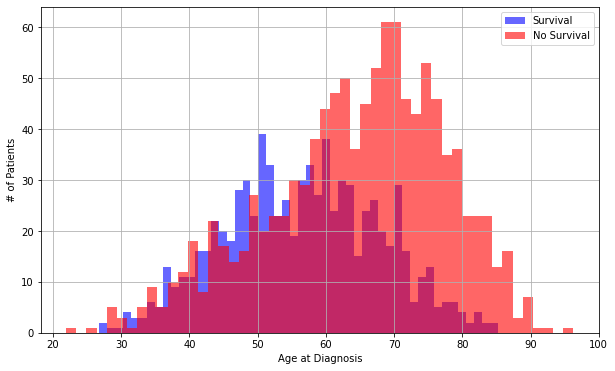

In [ ]:
plt.figure(figsize=(10,6))
brca[brca['overall_survival'] == 1]['age_at_diagnosis'].hist(bins=50, color='blue', label='Survival', alpha=0.6)
brca[brca['overall_survival'] == 0]['age_at_diagnosis'].hist(bins=50, color='red', label='No Survival', alpha=0.6)
plt.xlabel('Age at Diagnosis')
plt.ylabel('# of Patients')
plt.legend()

Starting at mid- to late 50s for age at diagnosis, chances of survival for breast cancer patients dramatically decrease

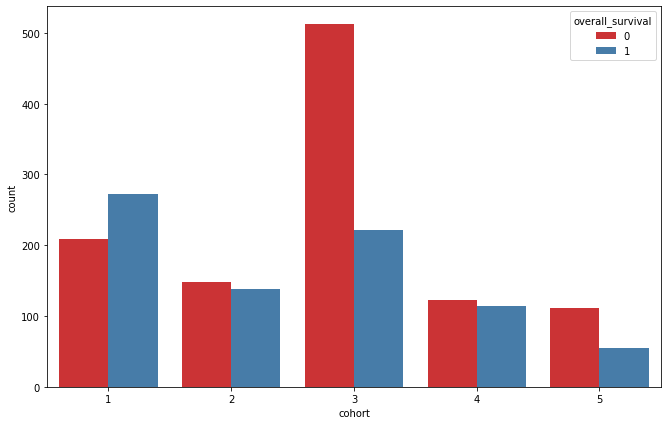

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='cohort', hue='overall_survival', data=brca, palette='Set1')

Each cohort share a defining characteristic. Cohort 3 contains an extremely high number of non-surviving breast cancer patients.

## Bin Age at Diagnosis Feature

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer  
kbd = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='quantile')
X_age = brca.iloc[:,1].values
X_age_kbd = kbd.fit_transform(X_age.reshape(-1,1))

X_age_kbd = X_age_kbd.toarray()

## Encode categorical data

In [ ]:
# OneHotEncode categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct_ohe = ColumnTransformer(transformers=[('encoder1', OneHotEncoder(sparse=False), slice(1,5)),
                                     ('encoder2', OneHotEncoder(sparse=False), slice(6,14)),
                                     ('encoder3', OneHotEncoder(sparse=False), slice(15,18)),
                                     ('encoder4', OneHotEncoder(sparse=False), [21,23,25,27,28])], remainder='passthrough')
X_ohe = np.array(ct_ohe.fit_transform(X_clinic))
X_ohe_binorig = np.array(ct_ohe.fit_transform(X_clinic))

# OrdinalEncode categorical columns
from sklearn.preprocessing import OrdinalEncoder
ct_oe = ColumnTransformer(transformers=[('encoder5', OrdinalEncoder(), slice(1,5)),
                                        ('encoder6', OrdinalEncoder(), slice(6,10)),
                                        ('encoder7', OrdinalEncoder(), slice(11,14)),
                                        ('encoder8', OrdinalEncoder(), slice(15,18)),
                                        ('encoder9', OrdinalEncoder(), [21,23,25,28])], remainder='passthrough')
X_oe = np.array(ct_oe.fit_transform(X_clinic))

clinic = ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
          'er_status', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster',
          'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'age_at_diagnosis', 'chemotherapy', 'neoplasm_histologic_grade',
          'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'radio_therapy', 'tumor_size', 'tumor_stage']

In [ ]:
# Get rid of the original age_at_diagnosis and append the binned version to the end of the dataset
X_ohe_binorig = np.delete(X_ohe_binorig, 81, axis=1)
X_ohe_binorig = np.append(X_ohe_binorig, X_age_kbd, axis=1)

## Split the dataset with original age_at_diagnosis into the Training set and Test set for kNN and Tree models

In [ ]:
from sklearn.model_selection import train_test_split

# Feature scaling for kNN
from sklearn.preprocessing import StandardScaler
sc_knn = StandardScaler()
X_ohe = sc_knn.fit_transform(X_ohe)

# kNN
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.25, random_state = 42)

# Tree models
X_train_tree, X_test_tree, y_train, y_test = train_test_split(X_oe, y, test_size = 0.25, random_state = 42)

## Split the dataset with binned age_at_diagnosis into the Training set and Test set for Logistic Regression, and SVM models

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ohe_binorig = sc.fit_transform(X_ohe_binorig)

from sklearn.model_selection import train_test_split
X_train_binorig, X_test_binorig, y_train, y_test = train_test_split(X_ohe_binorig, y, test_size = 0.25, random_state = 42)

## ***Non-Tree-Based Algorithms***

## *Logistic Regression with Feature Selection*

## Train the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression(random_state = 42)
log_class.fit(X_train_binorig, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Logistic Regression k-folds Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
log_acc = cross_val_score(estimator = log_class, X = X_ohe_binorig, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', log_acc.mean(), '\nAccuracy SD:', log_acc.std())

Accuracy Mean: 0.9994736842105263 
Accuracy SD: 0.0015789473684210576


## Predict the Test set Results

In [ ]:
y_pred_log = log_class.predict(X_test_binorig)

## Make the Logistic Regression Confusion Matrix

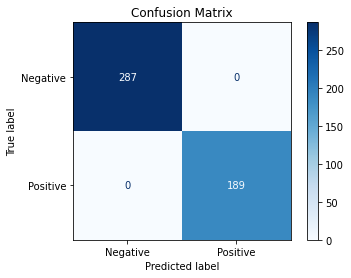

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(log_class, X_test_binorig, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [ ]:
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_log)*100),2)))

The accuracy score is 100.0%


#### **This is a high-performing, perfect model, but it is impossible. We expect some amount of uncertainty given the vast clinical data. Something is fishy here, and a leakage problem exists.**

## Update X_train, X_test to exclude data that is collected *after death*

In [ ]:
# Drop OneHotEncoded death_from_cancer columns since this is a 20/20 hindsight observation, causing the data leak
X_ohe_bin = np.delete(X_ohe_binorig, [78,79,80], axis=1)

from sklearn.model_selection import train_test_split
X_train_bin, X_test_bin, y_train, y_test = train_test_split(X_ohe_bin, y, test_size = 0.25, random_state = 42)

## Feature Selection using Logistic Regression with L1 penalty (similar to LassoCV)
*   This method penalizes coefficients of variables by shrinking (regularizing) them - some to zero
*   *Feature Selection* - Non-zero coefficients are selected to be part of the model
*   Requires model (relationship between X and y) for selection analysis

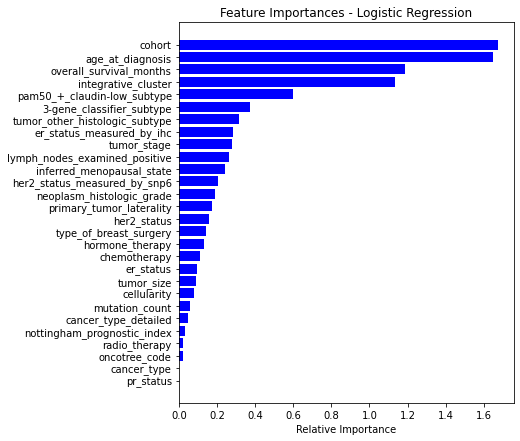

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(X_train_bin, y_train)

importance = np.abs(log.coef_)

# Sum Coef's for type_of_breast_surgery
feat_br_srg = importance[0,0:2].sum()
# Sum Coef's for cancer_type
feat_can = importance[0,2:4].sum()
# Sum Coef's for cancer_type_detailed
feat_can_d = importance[0,4:10].sum()
# Sum Coef's for cellularity
feat_cell = importance[0,10:13].sum()
# Sum Coef's for pam50_+_claudin-low_subtype
feat_pam = importance[0,13:20].sum()
# Sum Coef's for cohort
feat_cohort = importance[0,20:25].sum()
# Sum Coef's for er_status_measured_by_ihc
feat_er_ihc = importance[0,25:27].sum()
# Sum Coef's for er_status
feat_er = importance[0,27:29].sum()
# Sum Coef's for neoplasm_histologic_grade
feat_neo = importance[0,29:32].sum()
# Sum Coef's for her2_status_measured_by_snp6
feat_her_snp = importance[0,32:36].sum()
# Sum Coef's for her2_status
feat_her = importance[0,36:38].sum()
# Sum Coef's for tumor_other_histologic_subtype
feat_hist = importance[0,38:46].sum()
# Sum Coef's for inferred_menopausal_state
feat_meno = importance[0,46:48].sum()
# Sum Coef's for integrative_cluster
feat_clust = importance[0,48:59].sum()
# Sum Coef's for primary_tumor_laterality
feat_tulat = importance[0,59:61].sum()
# Sum Coef's for oncotree_code
feat_tree = importance[0,61:67].sum()
# Sum Coef's for pr_status
feat_pr = importance[0,67:69].sum()
# Sum Coef's for 3-gene_classifier_subtype
feat_class = importance[0,69:73].sum()
# Sum Coef's for tumor_stage
feat_stage = importance[0,73:78].sum()
# Sum Coef's for age_of_diagnosis
feat_age = importance[0,86:].sum()

feat_rest = importance[0,78:86]

# Assemble array of coef values of Features
feat_surv = np.array([feat_age, feat_br_srg, feat_can, feat_can_d, feat_cell, feat_pam, feat_cohort, feat_er_ihc, feat_er,
                      feat_neo, feat_her_snp, feat_her, feat_hist, feat_meno, feat_clust, feat_tulat, feat_tree,
                      feat_pr, feat_class, feat_stage])

feat_surv = np.append(feat_surv, feat_rest)

indices = np.argsort(feat_surv)
plt.figure(figsize=(6,7))
plt.title('Feature Importances - Logistic Regression')
plt.barh(range(len(indices)), feat_surv[indices], color='b', align='center')
plt.yticks(range(len(indices)), np.array(clinic_bin)[indices])
plt.xlabel('Relative Importance')

plt.show()

Not surprisingly, cohort, age at diagnosis, overall survival months, and integrative cluster are at the top of the list of Feature Importance to predict survival. Cohort (range = 1-5) shares defining characteristics. Integrative cluster is the molecular subtype of breast cancer based on gene expression. We will select all Features, except for pr_status and cancer_type since they have 0 coefficients.

## Train the Logistic Regression model on the Updated Training set

In [ ]:
# Drop OneHotEncoded pr_status and cancer_type column
X_ohe_binlog = np.delete(X_ohe_bin, [2,3,67,68], axis=1)

from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train, y_test = train_test_split(X_ohe_binlog, y, test_size = 0.25, random_state = 42)

# Fit Logistic Regression on updated Training set
from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression(random_state = 42)
log_class.fit(X_train_log, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Logistic Regression k-folds Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
log_acc = cross_val_score(estimator = log_class, X = X_ohe_binlog, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', log_acc.mean(), '\nAccuracy SD:', log_acc.std())

cvacc = []
cvacc_std = []
cvacc.append(round(log_acc.mean(), 4))
cvacc_std.append(round(log_acc.std(), 4))

Accuracy Mean: 0.7017167263709011 
Accuracy SD: 0.07144088909799642


## Predict the Updated Test set Results

In [ ]:
y_pred_log = log_class.predict(X_test_log)

## Make the Logistic Regression Confusion Matrix

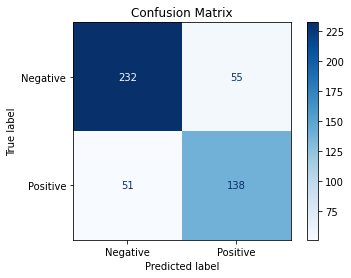

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(log_class, X_test_log, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [ ]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_log)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival = []
fpr_survival.append(round(FPR[0], 4))

In [ ]:
test_acc = []
test_acc.append(round((accuracy_score(y_test, y_pred_log)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_log)*100),2)))

The accuracy score is 77.73%


## Logistic Regression ROC Curve

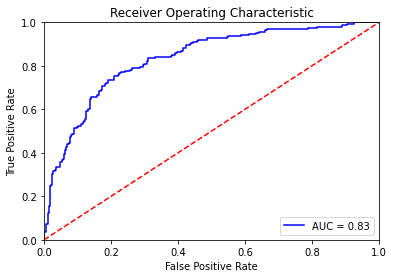

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = log_class.predict_proba(X_test_log)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_logfs = metrics.auc(fpr, tpr)
roc_auc = []
roc_auc.append(round(roc_auc_logfs, 2))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_logfs)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The Logistic Regression model gives good prediction on the patients' survival, with an accuracy score of 77.73%.

## *K-Nearest Neighbor*
- Based on Euclidean distance - similar data points are close to each other, close to the mode of a particular K label for classification
- Number of K labels chosen to reduce the number of errors while maintaining prediction accuracy

## Find optimal number of K neighbors using Elbow Method

Text(0, 0.5, 'Error Rate')

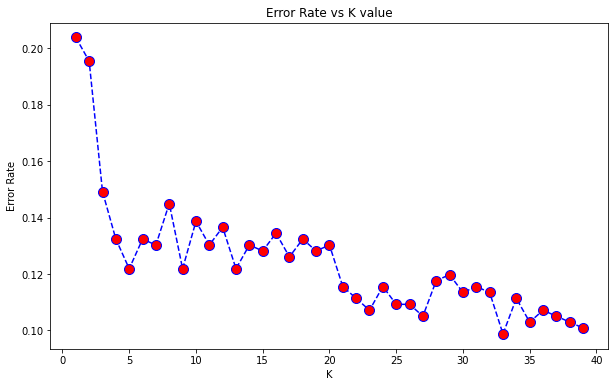

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_sc, y_train)
  pred_i = knn.predict(X_test_sc)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

K = 33 gives the lowest Error Rate

## Train the K-Nearest Neighbor model on the Training set

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors = 33, metric = 'minkowski', p = 2)
knn_class.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

## Predict the Test set Result

In [ ]:
y_pred_knn = knn_class.predict(X_test_sc)

## kNN k-folds Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
knn_acc = cross_val_score(estimator = knn_class, X = X_ohe, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', knn_acc.mean(), '\nAccuracy SD:', knn_acc.std())

cvacc.append(round(knn_acc.mean(), 4))
cvacc_std.append(round(knn_acc.std(), 4))

Accuracy Mean: 0.8839432350509782 
Accuracy SD: 0.03153595666461009


## Make the kNN Confusion Matrix

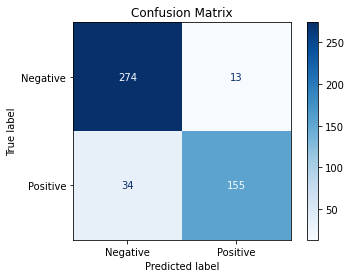

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(knn_class, X_test_sc, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [ ]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [ ]:
# ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
roc_auc.append(round(roc_auc_knn, 2))
print('ROC-AUC: %.2f' % round(roc_auc_knn, 2))

ROC-AUC: 0.89


In [ ]:
test_acc.append(round((accuracy_score(y_test, y_pred_knn)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

The accuracy score is 90.13%


*The K-Nearest Neighbor model gives excellent prediction on the patients' survival, with an accuracy score of 90.13%.*

## Map Predicted Accuracy to Patient ID

In [ ]:
X_set = sc_knn.inverse_transform(X_test_sc)
patient = []
surv_mo = []
surv_mo = list(X_set[:,-3])

for i in range(0, len(brca)):
    if brca.iloc[i,23] in surv_mo:
      patient.append(brca.iloc[i,0])

## Sample Table of Predicted vs. Actual Breast Cancer Survival - Test set (476 total)

In [ ]:
surv_knn = pd.DataFrame(zip(patient, list(y_pred_knn), list(y_test)))
surv_knn.columns = ['Patient ID', 'Predicted Survival','Actual Survival']

surv_knn = surv_knn.reset_index(drop=True)
surv_knn.index += 1 
surv_knn.head(25)

,Patient ID,Predicted Survival,Actual Survival
1,48,0,0
2,50,0,0
3,68,0,0
4,97,0,0
5,102,0,0
6,119,0,1
7,124,0,1
8,126,1,1
9,135,0,0
10,140,1,1


## *Support Vector Machine*
- Finds a hyperplane in N-dimensional space (N = number of features) that classifies the data points
- Choose the hyperplane with maximum margin, i.e. maximum distance between data points of two classes
- Position and orientation of hyperplane are determined by support vectors, i.e. data points closest to the hyperplane

## Train the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
svc_class = SVC(kernel = 'linear', random_state = 42)
svc_class.fit(X_train_bin, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

## Feature Selection

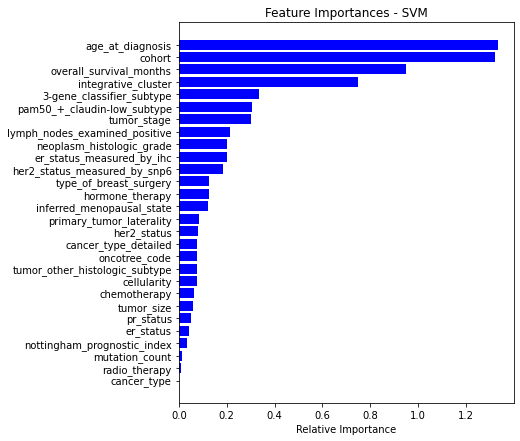

In [ ]:
importance = np.abs(svc_class.coef_)

# Sum coef's for type_of_breast_surgery
feat_br_srg = importance[0,0:2].sum()
# Sum coef's for cancer_type
feat_can = importance[0,2:4].sum()
# Sum coef's for cancer_type_detailed
feat_can_d = importance[0,4:10].sum()
# Sum coef's for cellularity
feat_cell = importance[0,10:13].sum()
# Sum coef's for pam50_+_claudin-low_subtype
feat_pam = importance[0,13:20].sum()
# Sum coef's for cohort
feat_cohort = importance[0,20:25].sum()
# Sum coef's for er_status_measured_by_ihc
feat_er_ihc = importance[0,25:27].sum()
# Sum coef's for er_status
feat_er = importance[0,27:29].sum()
# Sum coef's for neoplasm_histologic_grade
feat_neo = importance[0,29:32].sum()
# Sum coef's for her2_status_measured_by_snp6
feat_her_snp = importance[0,32:36].sum()
# Sum coef's for her2_status
feat_her = importance[0,36:38].sum()
# Sum coef's for tumor_other_histologic_subtype
feat_hist = importance[0,38:46].sum()
# Sum coef's for inferred_menopausal_state
feat_meno = importance[0,46:48].sum()
# Sum coef's for integrative_cluster
feat_clust = importance[0,48:59].sum()
# Sum coef's for primary_tumor_laterality
feat_tulat = importance[0,59:61].sum()
# Sum coef's for oncotree_code
feat_tree = importance[0,61:67].sum()
# Sum coef's for pr_status
feat_pr = importance[0,67:69].sum()
# Sum coef's for 3-gene_classifier_subtype
feat_class = importance[0,69:73].sum()
# Sum coef's for tumor_stage
feat_stage = importance[0,73:78].sum()
# Sum Coef's for age_of_diagnosis
feat_age = importance[0,86:].sum()

feat_rest = importance[0,78:86]

# Assemble array of coef values of Features
feat_surv = np.array([feat_age, feat_br_srg, feat_can, feat_can_d, feat_cell, feat_pam, feat_cohort, feat_er_ihc, feat_er,
                      feat_neo, feat_her_snp, feat_her, feat_hist, feat_meno, feat_clust, feat_tulat, feat_tree,
                      feat_pr, feat_class, feat_stage])

feat_surv = np.append(feat_surv, feat_rest)

indices = np.argsort(feat_surv)
plt.figure(figsize=(6,7))
plt.title('Feature Importances - SVM')
plt.barh(range(len(indices)), feat_surv[indices], color='b', align='center')
plt.yticks(range(len(indices)), np.array(clinic_bin)[indices])
plt.xlabel('Relative Importance')

plt.show()

Similar to Logistic Regression with Feature Selection, age_at_diagnosis, cohort, overall_survival_months, and integrative cluster top the list of Feature Importance. Keep all Features except for cancer_type.

## Update X_train, X_test

In [ ]:
# Drop cancer_type
X_ohe_binsvm = np.delete(X_ohe_bin, [2,3], axis=1)

from sklearn.model_selection import train_test_split
X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_ohe_binlog, y, test_size = 0.25, random_state = 42)

svc_class.fit(X_train_svm, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

## Predict the Test set Result

In [ ]:
y_pred_svc = svc_class.predict(X_test_svm)

## SVM k-folds Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
svc_acc = cross_val_score(estimator = svc_class, X = X_ohe_binsvm, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', svc_acc.mean(), '\nAccuracy SD:', svc_acc.std())

cvacc.append(round(svc_acc.mean(), 4))
cvacc_std.append(round(svc_acc.std(), 4))

Accuracy Mean: 0.7111573436208322 
Accuracy SD: 0.06757798182534837


## Make the SVM Confusion Matrix

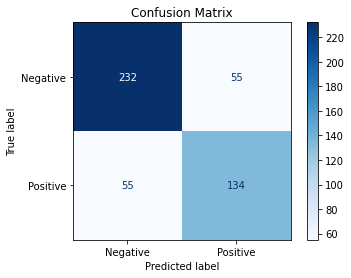

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(svc_class, X_test_svm, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [ ]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svc)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [ ]:
# ROC AUC
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
roc_auc.append(round(roc_auc_svc, 2))
print('ROC-AUC: %.2f' % round(roc_auc_svc, 2))

ROC-AUC: 0.76


In [ ]:
test_acc.append(round((accuracy_score(y_test, y_pred_svc)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_svc)*100),2)))

The accuracy score is 76.89%


## *Kernel SVM*
- Support Vector Machine with a kernel to separate each data point by projecting it into a higher dimension
- Kernel computes dot product of two vectors x and y in a high dimensional feature space
- Example - RBF kernel: *K(X$_{1}$,X$_{2}$) = exp(-$\gamma$||X$_{1}$ - X$_{2}$||$^{2}$)*, where ||X$_{1}$ - X$_{2}$|| is the Eucleadian distance between X$_{1}$ and X$_{2}$.

## Train the Kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
ksvc_class = SVC(kernel = 'rbf', random_state = 42)
ksvc_class.fit(X_train_bin, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

## Predict the Test set Result

In [ ]:
y_pred_ksvc = ksvc_class.predict(X_test_bin)

## Kernel SVM k-folds Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
ksvc_acc = cross_val_score(estimator = ksvc_class, X = X_ohe_bin, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', ksvc_acc.mean(), '\nAccuracy SD:', ksvc_acc.std())

cvacc.append(round(ksvc_acc.mean(), 4))
cvacc_std.append(round(ksvc_acc.std(), 4))

Accuracy Mean: 0.708572609534307 
Accuracy SD: 0.06831639533003901


## Make the Kernel SVM Confusion Matrix

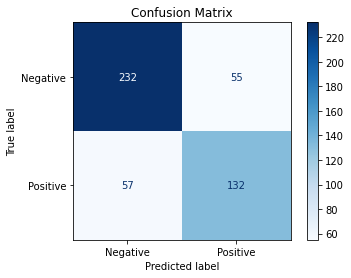

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(ksvc_class, X_test_bin, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [ ]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_ksvc)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [ ]:
# ROC AUC
roc_auc_ksvc = roc_auc_score(y_test, y_pred_ksvc)
roc_auc.append(round(roc_auc_ksvc, 2))
print('ROC-AUC: %.2f' % round(roc_auc_ksvc, 2))

ROC-AUC: 0.75


In [ ]:
test_acc.append(round((accuracy_score(y_test, y_pred_ksvc)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_ksvc)*100),2)))

The accuracy score is 76.47%


## *Multilayer Perceptron (MLP)*
- Consists of linear layers (combination of neurons)
- *Makeup:* input layer - one or more hidden layers - output layer
- Fully connected layers - units in a layer are connected to all units in previous layer
- Units are independent of each other and have unique set of weights
- Loss function is calculated and backpropagated to adjust weights
- Goal is to minimize loss and stop when optimal minimization reached to avoid overfitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the Training and Test sets
X_train_mlp, X_test_mlp, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2, random_state = 42)

# Drop OneHotEncoded death_from_cancer columns since this is a 20/20 hindsight observation, causing the data leak
X_train_mlp = np.delete(X_train_mlp, [78,79,80], axis=1)
X_test_mlp = np.delete(X_test_mlp, [78,79,80], axis=1)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_mlp = sc.fit_transform(X_train_mlp)
X_test_mlp = sc.transform(X_test_mlp)

# Split the Training set to 70% Training and 30% Validation holdout
X_train_mlp_70, X_train_mlp_30, y_train_70, y_train_30 = train_test_split(X_train_mlp, y_train,
                                                                          test_size = 0.3, random_state = 42)

## Build the Multilayer Perceptron

In [ ]:
import tensorflow as tf
# Initialize the MLP
mlp = tf.keras.models.Sequential()

# Add the input layer and the first hidden layer
mlp.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Add the second hidden layer
mlp.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Add the output layer
mlp.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Train the Multilayer Perceptron

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Compile the MLP
mlp.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Simple early stopping to prevent overfitting - go another 200 epochs to check for additional improvement
# Early stopping monitored by loss function to minimize loss of model for the specific modeling problem
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# Save best model accuracy
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Train the MLP on the Training set
history = mlp.fit(X_train_mlp_70, y_train_70, validation_data=(X_train_mlp_30, y_train_30), epochs=4000, verbose=0, callbacks=[es, mc])

# Load the saved model
saved_model = load_model('best_model.h5')

# Evaluate the model
_, acc_train = saved_model.evaluate(X_train_mlp_70, y_train_70, verbose=0)
_, acc_test = saved_model.evaluate(X_test_mlp, y_test, verbose=0)

cvacc.append(round(acc_train, 4))
cvacc_std.append(None)
print('Train: %.3f, Test: %.3f' % (acc_train, acc_test))


Epoch 00001: val_accuracy improved from -inf to 0.47046, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.47046 to 0.53392, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.53392 to 0.57330, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.57330 to 0.59519, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.59519 to 0.62363, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.62363 to 0.63457, saving model to best_model.h5

Epoch 00007: val_accuracy improved from 0.63457 to 0.66302, saving model to best_model.h5

Epoch 00008: val_accuracy improved from 0.66302 to 0.66958, saving model to best_model.h5

Epoch 00009: val_accuracy improved from 0.66958 to 0.68053, saving model to best_model.h5

Epoch 00010: val_accuracy improved from 0.68053 to 0.69365, saving model to best_model.h5

Epoch 00011: val_accuracy did not improve from 0.69365

Epoch 00012: val_accuracy improved f

## Predict the Test set results

In [ ]:
y_pred_mlp = saved_model.predict(X_test_mlp)
y_prcl_mlp = (y_pred_mlp > 0.5).astype('int32')

# reduce to 1d array
y_mlp_probs = y_pred_mlp[:, 0]
y_mlp_class = y_prcl_mlp[:, 0]

## Calculate Precision, Recall, F1-score, ROC-AUC

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# precision tp / (tp + fp)
precision_mlp = round(precision_score(y_test, y_mlp_class), 2)

# recall: tp / (tp + fn)
recall_mlp = round(recall_score(y_test, y_mlp_class), 2)

# f1: 2 tp / (2 tp + fp + fn)
f1_mlp = round(f1_score(y_test, y_mlp_class), 2)
 
# ROC AUC
roc_auc_mlp = roc_auc_score(y_test, y_mlp_probs)
roc_auc.append(round(roc_auc_mlp, 2))
print('ROC-AUC: %.2f' % round(roc_auc_mlp, 2))

ROC-AUC: 0.82


## Make the Confusion Matrix

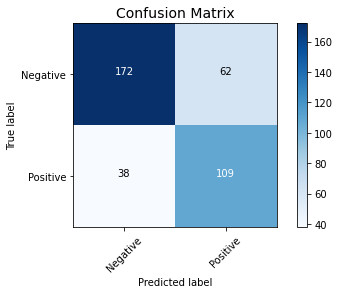

In [ ]:
# Customized confusion matrix function for neural network
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

# Create a confusion matrix
def nn_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['Negative', 'Positive']

cnf_matrix = confusion_matrix(y_test, y_mlp_class)
nn_confusion_matrix(cnf_matrix, labels, title="Confusion Matrix")

In [ ]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [ ]:
test_acc.append(round((accuracy_score(y_test, y_mlp_class)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_mlp_class)*100),2)))

The accuracy score is 73.75%


## ***Tree-Based Algorithms***

## *Decision Tree Classification*
- Consists of root node (has children), internal node (has both parent and children), leaf node (has parent)
- Max_depth - *Number of levels:* the more levels, the more complex the model, which can result in overfitting the training data with high test error
- Information gain measures node purity, or how clever a node can split items

In [ ]:
# Drop OneHotEncoded death_from_cancer columns since this is a 20/20 hindsight observation, causing the data leak
X_oe_tree = np.delete(X_oe, [17], axis=1)

X_train_tree, X_test_tree, y_train, y_test = train_test_split(X_oe_tree, y, test_size = 0.25, random_state = 42)

## Train the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt_class.fit(X_train_tree, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Predict the Test set Result

In [ ]:
y_pred_dt = dt_class.predict(X_test_tree)

## Decision Tree k-folds Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
dt_acc = cross_val_score(estimator = dt_class, X = X_oe_tree, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', dt_acc.mean(), '\nAccuracy SD:', dt_acc.std())

cvacc.append(round(dt_acc.mean(), 4))
cvacc_std.append(round(dt_acc.std(), 4))

Accuracy Mean: 0.6665445026178011 
Accuracy SD: 0.03851136895128206


## Make the Decision Tree Confusion Matrix

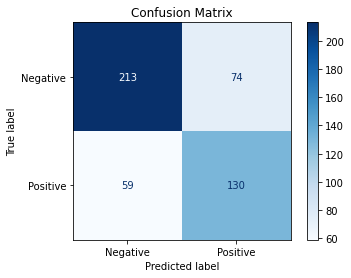

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(dt_class, X_test_tree, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [ ]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_dt)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [ ]:
test_acc.append(round((accuracy_score(y_test, y_pred_dt)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_dt)*100),2)))

The accuracy score is 72.06%


## Decision Tree ROC Curve

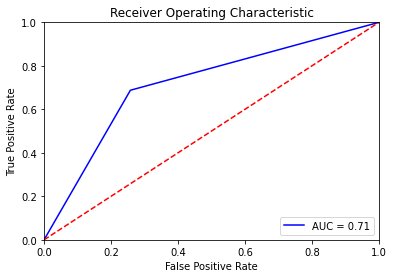

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dt_class.predict_proba(X_test_tree)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_dt = metrics.auc(fpr, tpr)
roc_auc.append(round(roc_auc_dt, 2))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance

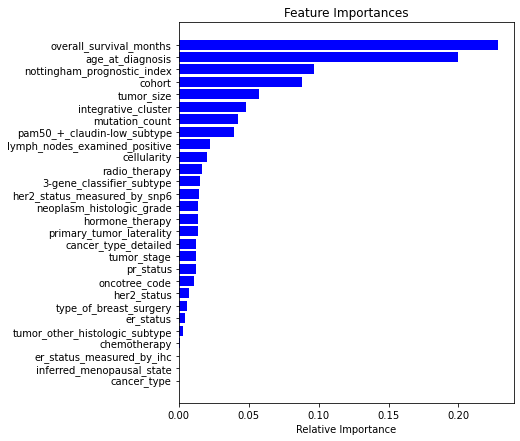

In [ ]:
dt_importances = dt_class.feature_importances_
indices = np.argsort(dt_importances)

plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), dt_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), np.array(clinic)[indices])
plt.xlabel('Relative Importance')

plt.show()

Overall_survival_months, age_at_diagnosis, nottingham_prognostic_index, and cohort top the list of Feature Importance.

## *Random Forest Classification*
- Bagging/Bootstrapping technique - Random sampling of subset of data reduces bias and variance
- Ensemble method has multiple decision tree models run independently, then output is averaged/aggregated

## Train the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf_class.fit(X_train_tree, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Predict the Test set Result

In [ ]:
y_pred_rf = rf_class.predict(X_test_tree)

## Random Forest k-folds Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
rf_acc = cross_val_score(estimator = rf_class, X = X_oe_tree, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', rf_acc.mean(), '\nAccuracy SD:', rf_acc.std())

cvacc.append(round(rf_acc.mean(), 4))
cvacc_std.append(round(rf_acc.std(), 4))

Accuracy Mean: 0.7358859189859466 
Accuracy SD: 0.07067979681271


## Make the Random Forest Confusion Matrix

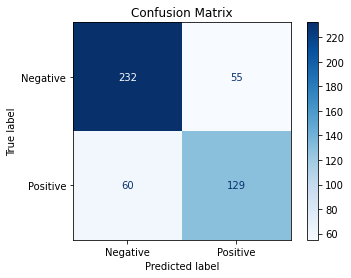

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(rf_class, X_test_tree, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [ ]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rf)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [ ]:
test_acc.append(round((accuracy_score(y_test, y_pred_rf)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_rf)*100),2)))

The accuracy score is 75.84%


## Random Forest ROC Curve

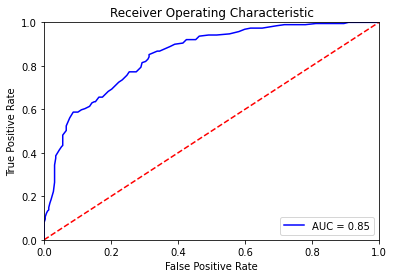

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_class.predict_proba(X_test_tree)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_rf = metrics.auc(fpr, tpr)
roc_auc.append(round(roc_auc_rf, 2))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance

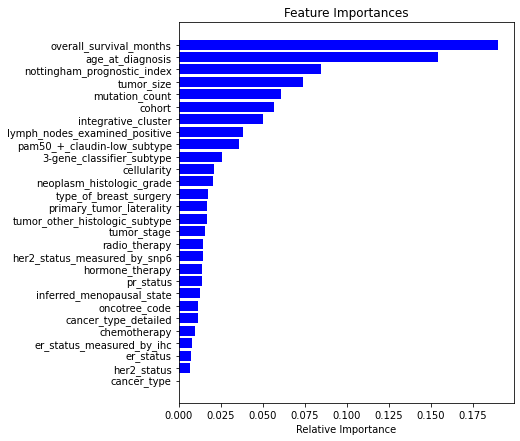

In [ ]:
rf_importances = rf_class.feature_importances_
indices = np.argsort(rf_importances)

plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), rf_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), np.array(clinic)[indices])
plt.xlabel('Relative Importance')

plt.show()

Similar to the Decision Trees model, overall_survival_months, age_at_diagnosis, and nottingham_prognostic_index top the list of Feature Importance.

## *XGBoost Classification*
- Builds sequential trees using parallel implementation by switching order of loops (1) to enumerate leaf nodes and (2) to calculate features
- Tree pruning - 'max-depth' parameter defined first then trees 'pruned' to improve computational performance
- Finds optimal split points in weighted datasets
- Built-in regularization via LASSO (L1) or Ridge (L2) to prevent overfitting
- Built-in cross validation

## Tune XGBoost n_estimators parameter

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
eval_set = [(X_test_tree, y_test)]
model.fit(X_train_tree, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test_tree)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.666044
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.643514
[2]	validation_0-logloss:0.625055
[3]	validation_0-logloss:0.61059
[4]	validation_0-logloss:0.596447
[5]	validation_0-logloss:0.584431
[6]	validation_0-logloss:0.575665
[7]	validation_0-logloss:0.567004
[8]	validation_0-logloss:0.55993
[9]	validation_0-logloss:0.552172
[10]	validation_0-logloss:0.547065
[11]	validation_0-logloss:0.542674
[12]	validation_0-logloss:0.536481
[13]	validation_0-logloss:0.531853
[14]	validation_0-logloss:0.526986
[15]	validation_0-logloss:0.524283
[16]	validation_0-logloss:0.520971
[17]	validation_0-logloss:0.514714
[18]	validation_0-logloss:0.512655
[19]	validation_0-logloss:0.509675
[20]	validation_0-logloss:0.506162
[21]	validation_0-logloss:0.503789
[22]	validation_0-logloss:0.501297
[23]	validation_0-logloss:0.499236
[24]	validation_0-logloss:0.496258
[25]	validation_0-logloss:0.494318
[26]	validation_0-logloss:0.49166


Best XGBoost n_estimator given X_test and y_test is 97.

## Train the XGBoost Classification model on the Training set

In [ ]:
from xgboost import XGBClassifier
xgb_class = XGBClassifier(n_estimator=97)
xgb_class.fit(X_train_tree, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=97,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

## Predict the Test set Result

In [ ]:
y_pred_xgb = xgb_class.predict(X_test_tree)

## XGBoost k-folds Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
xgb_acc = cross_val_score(estimator = xgb_class, X = X_oe_tree, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', xgb_acc.mean(), '\nAccuracy SD:', xgb_acc.std())

cvacc.append(round(xgb_acc.mean(), 4))
cvacc_std.append(round(xgb_acc.std(), 4))

Accuracy Mean: 0.7284706530724717 
Accuracy SD: 0.06046807063167887


## Make the XGBoost Confusion Matrix

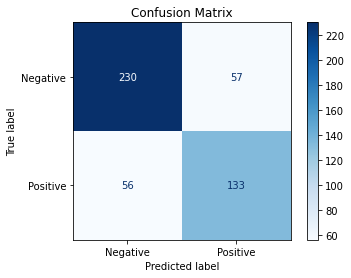

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(xgb_class, X_test_tree, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [ ]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_xgb)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [ ]:
test_acc.append(round((accuracy_score(y_test, y_pred_xgb)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_xgb)*100),2)))

The accuracy score is 76.26%


## XGBoost ROC Curve

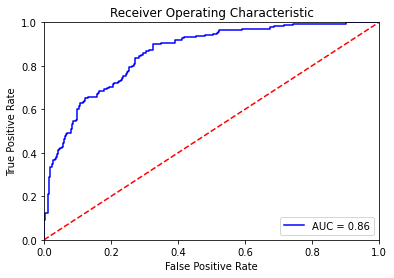

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb_class.predict_proba(X_test_tree)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_xgb = metrics.auc(fpr, tpr)
roc_auc.append(round(roc_auc_xgb, 2))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance

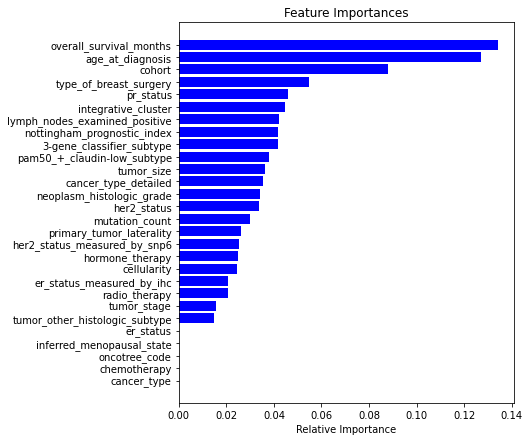

In [ ]:
xgb_importances = xgb_class.feature_importances_
indices = np.argsort(xgb_importances)

plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), xgb_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), np.array(clinic)[indices])
plt.xlabel('Relative Importance')

plt.show()

Overall_survival_months, age_at_diagnosis, and cohort top the list of Feature Importance.

**Let's dig deeper into how key features contribute to XGBoost model accuracy**

## SHAP Values
- SHAP (**SH**apely **A**dditive ex**P**lanations) values measure the impact of the order of features on model prediction by taking into account their interaction with other features
- Indicates not only which features are important, but also how each feature matters to model prediction; correlates level of feature value to target value
- Based on the [hallmark 2017 paper by Scott Lundberg and Su-In Lee](https://arxiv.org/pdf/1705.07874.pdf)

## SHAP Summary Plot for XGBoost
- Gives birds-eye view of feature importance and what is driving it
- Y-axis has feature names in order of importance from top to bottom based on the sum of SHAP value magnitudes
- Color shows if feature is high (red) or low (blue) for a particular dataset row (dot)
- Horizontal location shows if the effect of that value causes a higher or lower prediction

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


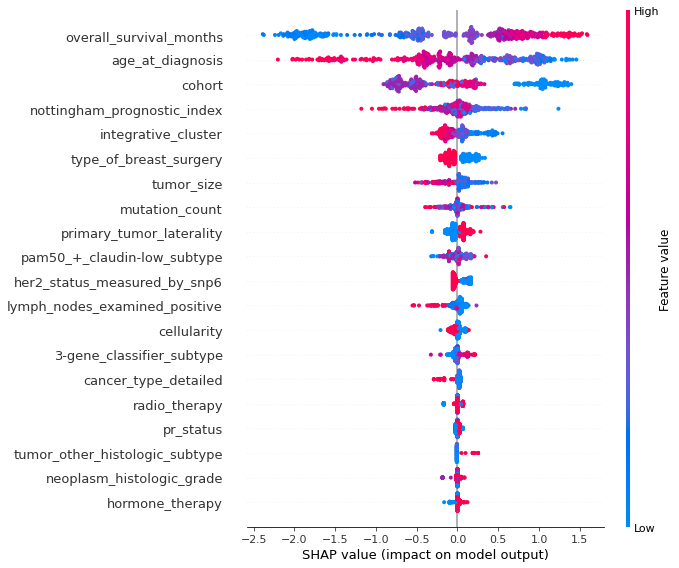

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_class)
shap_values = explainer.shap_values(X_test_tree, approximate=True)
X_test_dftree = pd.DataFrame(X_test_tree)
X_test_dftree.columns = clinic
shap.summary_plot(shap_values, X_test_dftree)

### Sample Interpretations
- High values of overall_survival_months result in higher survival predictions, while low values of overall_survival_months result in lower survival predictions
- The older you are when you are diagnosed for breast cancer (age_at_diagnosis), the lower the model prediction is for survival; the younger you are when you are diagnosed for breast cancer, the higher the model prediction is for survival
- Low cohort numbers result in higher survival prediction; mid-range cohort numbers have lower survival predictions; recall from the cohort bar graph that cohort 3 has an abnormally high number of non-survivors
- High nottingham_prognostic_index causes lower model prediction for survival; low nottingham_prognostic_index causes higher model prediction for survival

## SHAP Dependence Contribution Plots
- Shows the distribution of a single feature and how this impacts prediction
- *Feature Interaction* shows if the feature values in the distribution depend on the values of another feature (by color)
- Automatically selects another feature for coloring and effects of interaction

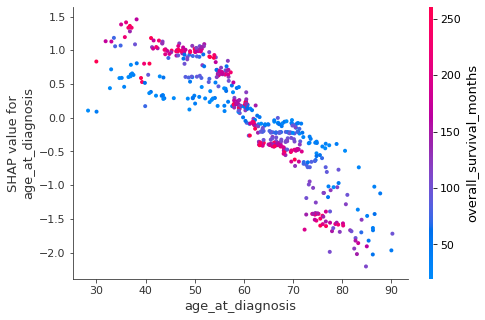

In [ ]:
shap.dependence_plot('age_at_diagnosis', shap_values, X_test_dftree)

### Interpretations
- The higher the age_at_diagnosis, the lower the model's prediction is for the person's survival
- If the overall_survival_months is high (red dots), the model's prediction is higher for survival at a young age_at_diagnosis (30 - 55)
- At age_of_diagnosis of 60+, the high overall_survival_months counterintuitively leads to a **lower** model prediction for survival probably because these patients are seniors and can die of natural causes or underlying health conditions unrelated to breast cancer the longer they live

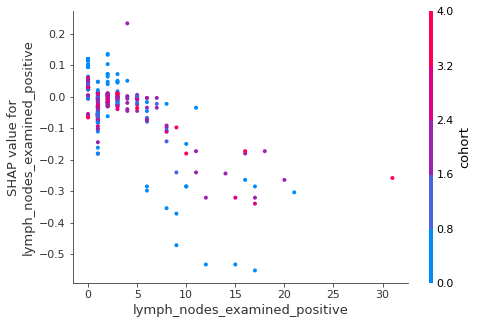

In [ ]:
shap.dependence_plot('lymph_nodes_examined_positive', shap_values, X_test_dftree)

**Fact:** If breast cancer spreads, the first place it will likely go to are the lymph nodes

### Interpretations

- The higher the lymph_nodes_examined_positive, the lower the model's prediction is for the person's survival
- Cohorts 2-4 (purple to red dots) do not affect the model's prediction for survival when lymph_nodes_examined_positive is low (0-7)
- Cohorts 2-4 (purple to red dots) have higher model prediction for survival when lymph_nodes_examined_positive is 8+.

## Model Summary

In [ ]:
model = ['Logistic-Feature Select', 'K-Nearest Neighbor', 'SVM', 'Kernel-SVM',
         'Multilayer Perceptron', 'Decision Tree', 'Random Forest', 'XGBoost']
sum_stats = pd.DataFrame(zip(model, cvacc, cvacc_std, test_acc, fpr_survival, roc_auc))
sum_stats.columns = ['Model', 'Cross Validation Score', 'CV std dev', 'CM Test Accuracy (%)',
                     'False Positive Rate', 'ROC-AUC']
sum_stats = sum_stats.sort_values('CM Test Accuracy (%)', ascending=False)
sum_stats = sum_stats.reset_index(drop=True)
sum_stats.index += 1 
sum_stats

,Model,Cross Validation Score,CV std dev,CM Test Accuracy (%),False Positive Rate,ROC-AUC
1,K-Nearest Neighbor,0.8839,0.0315,90.13,0.0453,0.89
2,Logistic-Feature Select,0.7017,0.0714,77.73,0.1916,0.83
3,SVM,0.7112,0.0676,76.89,0.1916,0.76
4,Kernel-SVM,0.7086,0.0683,76.47,0.1916,0.75
5,XGBoost,0.7285,0.0605,76.26,0.1986,0.86
6,Random Forest,0.7359,0.0707,75.84,0.1916,0.85
7,Multilayer Perceptron,0.9006,NaN,73.75,0.2650,0.82
8,Decision Tree,0.6665,0.0385,72.06,0.2578,0.71


### Evaluate Classification Reports for Top 7
- 0 = No Survival
- 1 = Survival

#### K-Nearest Neighbor

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       287
           1       0.92      0.82      0.87       189

    accuracy                           0.90       476
   macro avg       0.91      0.89      0.89       476
weighted avg       0.90      0.90      0.90       476



#### Logistic Regression with Feature Selection

In [ ]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       287
           1       0.72      0.73      0.72       189

    accuracy                           0.78       476
   macro avg       0.77      0.77      0.77       476
weighted avg       0.78      0.78      0.78       476



#### SVM

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       287
           1       0.71      0.71      0.71       189

    accuracy                           0.77       476
   macro avg       0.76      0.76      0.76       476
weighted avg       0.77      0.77      0.77       476



#### Kernel SVM (RBF)

In [ ]:
print(classification_report(y_test, y_pred_ksvc))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       287
           1       0.71      0.70      0.70       189

    accuracy                           0.76       476
   macro avg       0.75      0.75      0.75       476
weighted avg       0.76      0.76      0.76       476



#### XGBoost

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       287
           1       0.70      0.70      0.70       189

    accuracy                           0.76       476
   macro avg       0.75      0.75      0.75       476
weighted avg       0.76      0.76      0.76       476



#### Random Forest

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       287
           1       0.70      0.68      0.69       189

    accuracy                           0.76       476
   macro avg       0.75      0.75      0.75       476
weighted avg       0.76      0.76      0.76       476



#### Multilayer Perceptron

In [ ]:
# Results for 1 = Survived
print('Precision: %.2f' % precision_mlp)
print('Recall: %.2f' % recall_mlp)
print('F1 score: %.2f' % f1_mlp)

Precision: 0.64
Recall: 0.74
F1 score: 0.69


Based on the classification reports, **K-Nearest Neighbor** gives us the best precision, recall, f1-score, and test accuracy. We must also pay special attention to the False Positive Rate, which is the rate at which patients are predicted to survive breast cancer but, in reality, don't. KNN has a low FPR. Thus, this is the best overall model.

Binning age_at_diagnosis feature improves the Logistic Regression, SVM, and Kernel-SVM models. However, binning has no beneficial effect for K-Nearest Neighbor and the Tree models since they can learn to split up the data anywhere. Thus, the original age_at_diagnosis data were fed into these models.

## Conclusion

#### **Using the K-Nearest Neighbor model, we can predict breast cancer survival with excellent accuracy, precision, and recall based on clincal data. Logistic Regression, Multilayer Perceptron, Random Forest, XGBoost, SVM, and Kernel-SVM also give good accuracy but with lower precision and recall. With this information and given a patient's clinical features, doctors can administer additional, alternative, and/or more aggressive treatments on patients who are predicted not to survive so that they may vigorously fight the cancer with 'all hands on deck'.**